# Samantha Bracellari

## CSI 5810 Assignment 3

### Problem 1 - The Perceptron Learning Rule

In [24]:
# import libs
import numpy as np

# class 1 - positive examples; biases augmented at beginning
A = np.array([1, 2, 2]) 
B = np.array([1, 3, 5])

# class 2 - negative examples; biases augmented at beginning
C = np.array([1, 1, 3])
D = np.array([1, -1, -0.5])

w0 = np.array([1, 1, 1]) # initial weight vector

solution = 0
iteration = 0

while solution is 0:
    iteration += 1
    solution = 1

    print('\nIteration', iteration, '\n')

    if (np.sum(w0*A) < 0):
        print('The number', np.sum(w0*A), 'is not acceptable for class A. Adjusting weight to', w0 + A)
        w0 += A
        solution = 0
    else: 
        print('The number', np.sum(w0*A), 'is acceptable for class A.')

    if (np.sum(w0*B) < 0):
        print('The number', np.sum(w0*B), 'is not acceptable for class B. Adjusting weight to', w0 + B)
        w0 += B
        solution = 0
    else: 
        print('The number', np.sum(w0*B), 'is acceptable for class B.')
    
    if (np.sum(w0*C) >= 0):
        print('The number', np.sum(w0*C), 'is not acceptable for class C. Adjusting weight to', w0 - C)
        w0 -= C
        solution = 0
    else: 
        print('The number', np.sum(w0*C), 'is acceptable for class C.')
    
    if (np.sum(w0*D) >= 0):
        print('The number', np.sum(w0*D), 'is not acceptable for class D. Adjusting weight to', w0 - D, '\n')
        w0 = w0 - D
        solution = 0
    else: 
        print('The number', np.sum(w0*D), 'is acceptable for class D.\n')
    
print('\nFinal weight vector:', w0)
        


Iteration 1 

The number 5 is acceptable for class A.
The number 9 is acceptable for class B.
The number 5 is not acceptable for class C. Adjusting weight to [ 0  0 -2]
The number 1.0 is not acceptable for class D. Adjusting weight to [-1.   1.  -1.5] 


Iteration 2 

The number -2.0 is not acceptable for class A. Adjusting weight to [0.  3.  0.5]
The number 11.5 is acceptable for class B.
The number 4.5 is not acceptable for class C. Adjusting weight to [-1.   2.  -2.5]
The number -1.75 is acceptable for class D.


Iteration 3 

The number -2.0 is not acceptable for class A. Adjusting weight to [ 0.   4.  -0.5]
The number 9.5 is acceptable for class B.
The number 2.5 is not acceptable for class C. Adjusting weight to [-1.   3.  -3.5]
The number -2.25 is acceptable for class D.


Iteration 4 

The number -2.0 is not acceptable for class A. Adjusting weight to [ 0.   5.  -1.5]
The number 7.5 is acceptable for class B.
The number 0.5 is not acceptable for class C. Adjusting weight to [-

-----

### Problem 2 - The Majority Rule

In [1]:
# import libs
from scipy.special import comb
import math

def majority(L, p): # where L = number of learners, p = accuracy of each learner
    accuracy = 0 # initial accuracy
    for m in range (0, math.floor(L/2) + 1): # add 1 since the upper bound is not inclusive
        c = comb(L, m) # n choose r combination
        accuracy += c*(p**(L-m)*(1-p)**m) # majority rule equation
    return accuracy

acc = majority(7, 0.55) # 7 learners, each with 55% accuracy
print('Accuracy with 7 learners:', round(acc*100, 4), '%')

Accuracy with 7 learners: 60.8288 %


In [2]:
# next, calculate how many learners are needed to reach 90% accuracy
l = 0 # inital number of learners
accuracy = 0 # inital accuracy
while (accuracy < 0.90):
    l += 1
    accuracy = majority(l, 0.55)
    
print('\nNumber of learners required for 90% accuracy:', l)


Number of learners required for 90% accuracy: 144


-----

### Problem 3 - Fisher's Linear Discriminant

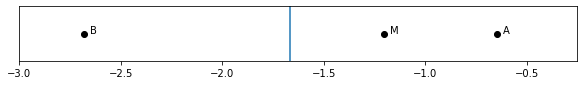

In [26]:
# import libs
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# define classes
A = np.array([[2, 10], [2, 5], [1, 2], [4, 9]]) # class 1
B = np.array([[8, 4], [5, 8], [7, 5], [6, 4]]) # class 2

# compute class means
mean_a = np.mean(A, axis=0)
mean_b = np.mean(B, axis=0)

# calculate scatter matrices
scatter_a = 3*np.cov(A.T)
scatter_b = 3*np.cov(B.T)
S = scatter_a + scatter_b # total scatter matrix

S_inv = inv(S) # calcluate the inverse of S

# calculate projections
w = np.matmul(S_inv, (mean_a-mean_b)) 
proj_a = np.matmul(w.T, mean_a)
proj_b = np.matmul(w.T, mean_b)
z_cut = 0.5*(proj_a+proj_b) # cutoff value

M = [3, 3] # point to test
proj_m = np.matmul(w.T, M)

# plot projections and cutoff
values = [proj_a, proj_b, proj_m] 

plt.annotate('A', xy=(proj_a+0.03, 0))
plt.annotate('B', xy=(proj_b+0.03, 0))
plt.annotate('M', xy=(proj_m+0.03, 0))
plt.scatter(values, [0, 0, 0], c='black')
plt.rcParams["figure.figsize"] = (10, 1)
plt.axvline(z_cut)
plt.xlim(-3, -0.25)
plt.yticks([])
plt.show()

-----

### Problem 4 - GINI Impurity

In [23]:
# import libs
import pandas as pd
import numpy as np

# define dataframe to work with
cols = ['color', 'shape', 'size', 'class']
data = np.array([
    ['red', 'square', 'big', '+'],
    ['blue', 'square', 'big', '+'],
    ['red', 'round', 'small', '-'],
    ['green', 'square', 'small', '-'],
    ['red', 'round', 'big', '+'],
    ['green', 'square', 'big', '-']
])

data = pd.DataFrame(data, columns=cols)

# functionn to calculate GINI impurity
def gini(a, b):
    return 2*(a/(a+b))*(b/(a+b))

# calculate GINI index for the color feature
red_gini = gini(2, 1)
blue_gini = gini(1, 0)
green_gini = gini(0, 2)

color_gini = (3/6)*red_gini + (1/6)*blue_gini + (2/6)*green_gini

# calculate GINI index for the shape feature
square_gini = gini(2, 2)
round_gini = gini(1, 1)

shape_gini = (4/6)*square_gini + (2/6)*round_gini

# calculate GINI index for the size feature
big_gini = gini(3, 1)
small_gini = gini(0, 2)

size_gini = (4/6)*big_gini + (2/6)*small_gini

print('GINI impurity for color feature:', color_gini)
print('GINI impurity for shape feature:', shape_gini)
print('GINI impurity for size feature:', size_gini)

GINI impurity for color feature: 0.2222222222222222
GINI impurity for shape feature: 0.5
GINI impurity for size feature: 0.25


-----

### Problem 5 - Neural Networks

In [3]:
# import libs
import numpy as np

# sigmoidal activation function
def sigmoid(output):
    return 1/(1 + np.exp(-output))

# PART 1: DETERMINE NEURAL NET OUTPUT
initial_inputs = np.array([1, 0]) # inputs into the hidden layer
w3 = np.array([3, 4]) # weights on node u3
w4 = np.array([6, 5]) # weights on node u4
w5 = np.array([2, 4]) # weights on node u5

h3 = sigmoid(np.dot(initial_inputs, w3) + 1) # output of hidden layer node 1 (u3)
h4 = sigmoid(np.dot(initial_inputs, w4) - 6) # output of hidden layer node 2 (u4)

hidden_inputs = np.array([h3, h4]) # hidden layer outputs become inputs for next layer

output = sigmoid(np.dot(hidden_inputs, w5) - 3.93) # output of the entire neural net
print('Output with original weights:', output)

Output with original weights: 0.5085060742863741


In [4]:
# PART 2: GENERALIZED DELTA RULE
w3_new, w4_new, w5_new = 0, 0, 0 # new weights, initially 0
target = 1 # target value
alpha = 0.025 # learning rate

for i in range (2000): # reduce the error through multiple iterations
    error = (target-output) # target is 1, output is defined in part 1
    gd = error*output*(1-output)*initial_inputs # gradient descent

    # calculate new weights using the learning rate and the gradient descent
    w3_new = w3 + alpha*gd
    w4_new = w4 + alpha*gd
    w5_new = w5 + alpha*gd
    w3, w4, w5 = w3_new, w4_new, w5_new

# run the new weights through the original neural net as a check
h3 = sigmoid(np.dot(initial_inputs, w3) + 1) # output of hidden layer node 1 (u3)
h4 = sigmoid(np.dot(initial_inputs, w4) - 6) # output of hidden layer node 2 (u4)

hidden_inputs = np.array([h3, h4]) # hidden layer outputs become inputs for next layer

output = sigmoid(np.dot(hidden_inputs, w5) - 3.93) # output of the entire neural net
print('Output with updated weights:', output)

print('\nNew weight from u1 to u3:', w3_new[0])
print('New weight from u3 to u5:', w5_new[0])


Output with updated weights: 0.9997262414858352

New weight from u1 to u3: 9.141896011053635
New weight from u3 to u5: 8.141896011053346
